# Sea Level Predictor

**This notebook addresses project 5 of the course at freecodecamp.org**
> https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/sea-level-predictor

<div><section id="instructions">
<p>You will analyze a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.</p>

#### Tasks

Use the data to complete the following tasks

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

> ##### 1. Use Pandas to import the data from epa-sea-level.csv

In [2]:
df = pd.read_csv('resources/epa-sea-level.csv')
df.info()
df.head()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


Index(['Year', 'CSIRO Adjusted Sea Level', 'Lower Error Bound',
       'Upper Error Bound', 'NOAA Adjusted Sea Level'],
      dtype='object')

> ##### 2. Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis

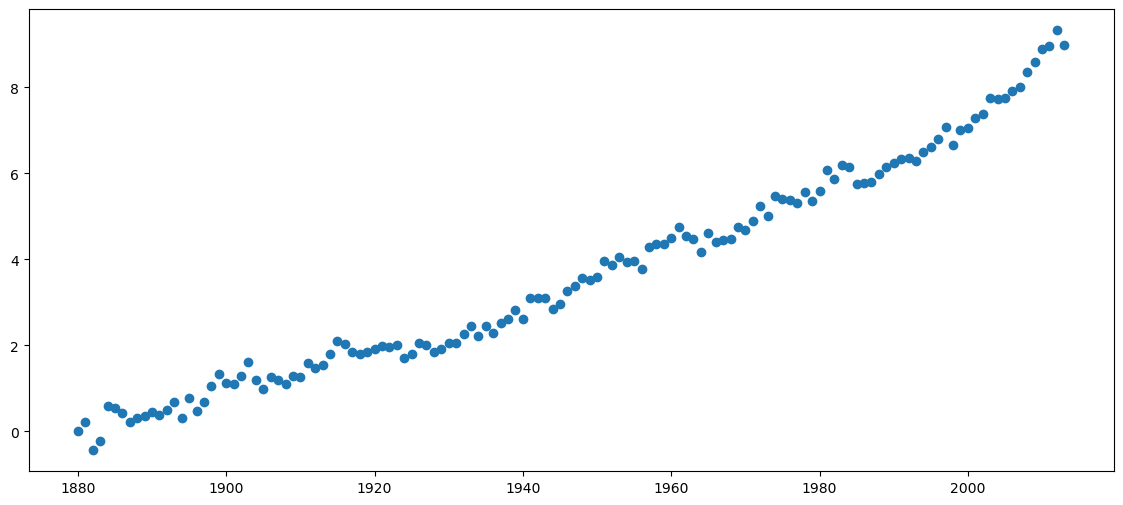

In [3]:
plt.figure(figsize=(14, 6))
plt.scatter(x='Year', y='CSIRO Adjusted Sea Level', data=df)
plt.show()

> ##### 3. Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. 

Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

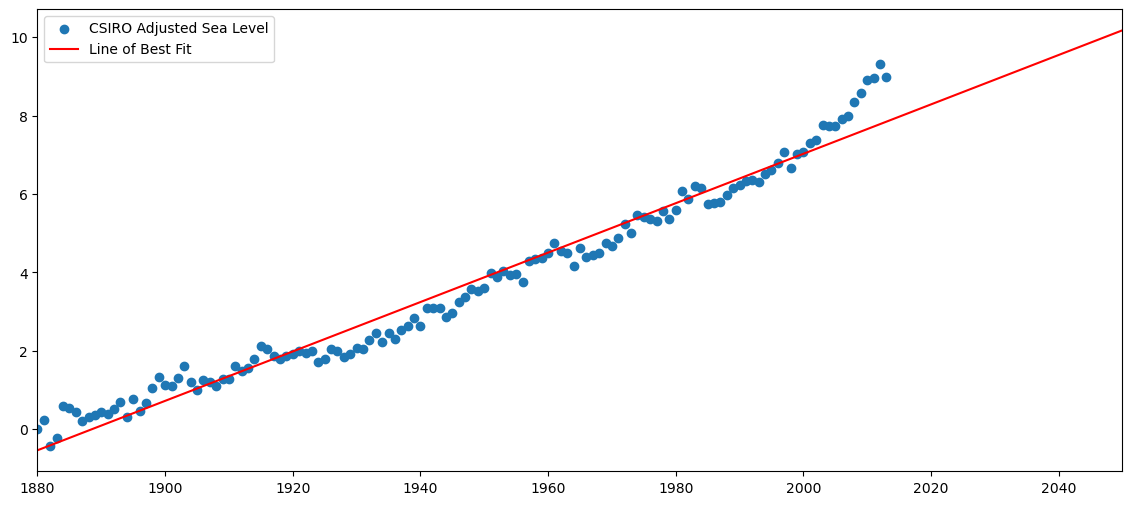

In [4]:
plt.figure(figsize=(14, 6))
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
plt.scatter(x='Year', y='CSIRO Adjusted Sea Level', data=df)
x = range(1880, 2051)  # Range of x-values from 1880 to 2050
y = slope * x + intercept  # Calculate y-values using the slope and y-intercept
plt.plot(x, y, color='red', label='Line of Best Fit')
plt.xlim(1880, 2050)
plt.legend()
plt.show()

> ##### 4. Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. 

Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000. The x label should be Year, the y label should be Sea Level (inches), and the title should be Rise in Sea Level.

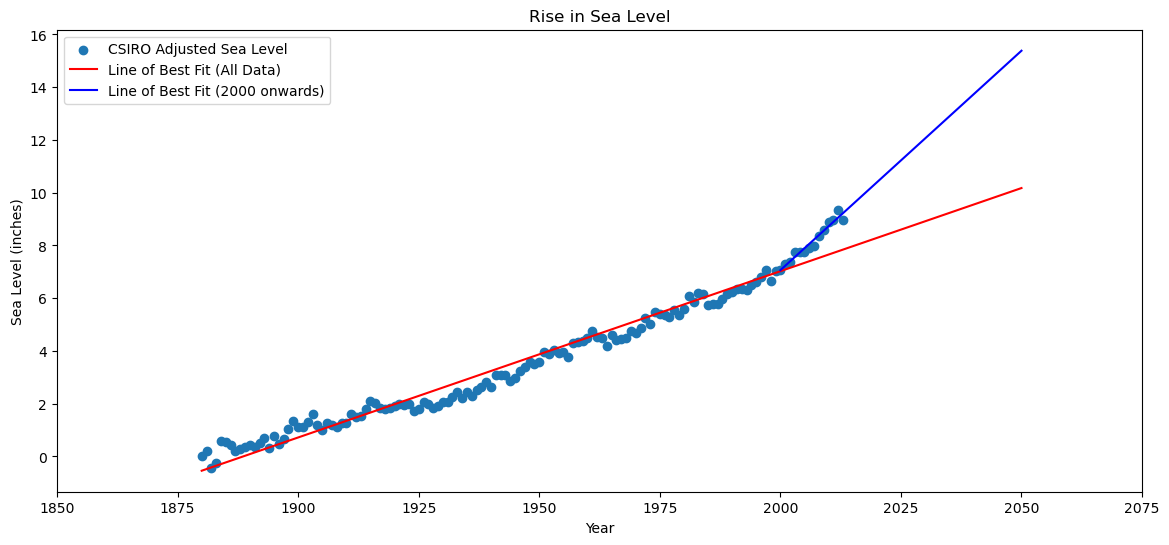

In [5]:
# Create scatter plot
plt.figure(figsize=(14, 6))
plt.scatter(x='Year', y='CSIRO Adjusted Sea Level', data=df)

# Create line of best fit
slope_all, intercept_all, r_value_all, p_value_all, std_err_all = stats.linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
x_all = np.arange(1880, 2051)
y_all = slope_all * x_all + intercept_all
plt.plot(x_all, y_all, color='red', label='Line of Best Fit (All Data)')

# Create second line of best fit
# Filter the dataset to include data from year 2000 onwards
df_filtered = df[df['Year'] >= 2000]
slope_filtered, intercept_filtered, r_value_filtered, p_value_filtered, std_err_filtered = stats.linregress(df_filtered['Year'], df_filtered['CSIRO Adjusted Sea Level'])
x_filtered = np.arange(2000, 2051)
y_filtered = slope_filtered * x_filtered + intercept_filtered
plt.plot(x_filtered, y_filtered, color='blue', label='Line of Best Fit (2000 onwards)')

# Set x-axis limits
plt.xlim(1850, 2075)

# Add x-label, y-label, and title
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')

# Add legend
plt.legend()

# Show the plot
plt.show()

